In [1]:
import backdoor
import os
os.chdir('../')

In [2]:

ds = backdoor.dataset.IMDBWiki()
data = ds.get_data(True)

Generating dataset with (48, 48) images and top 10 classes...
Created 10 classes: ['Simon Baker', 'Jensen Ackles', 'Julianne Moore', 'Jon Hamm', 'Bruce Willis', 'Jim Parsons', 'Leighton Meester', 'Will Smith', 'Neil Patrick Harris', 'Matthew Perry']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 460723/460723 [00:36<00:00, 12698.55it/s]


In [3]:
len(data['train'])

3334

In [22]:
import torch
# model = torch.load('./weights/tm3_v2:clean_85cb30.pth')
model = torch.load('weights/tm3_v2:clean_aa75fd.pth')

In [23]:
trainer = backdoor.training.Trainer(model, use_wandb=False)

In [24]:
preds = trainer.inference(data['test'].X)
classifications = preds.argmax(1)

In [25]:
len(classifications)

834

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [27]:
cm = confusion_matrix(data['test'].y, classifications, normalize='true')

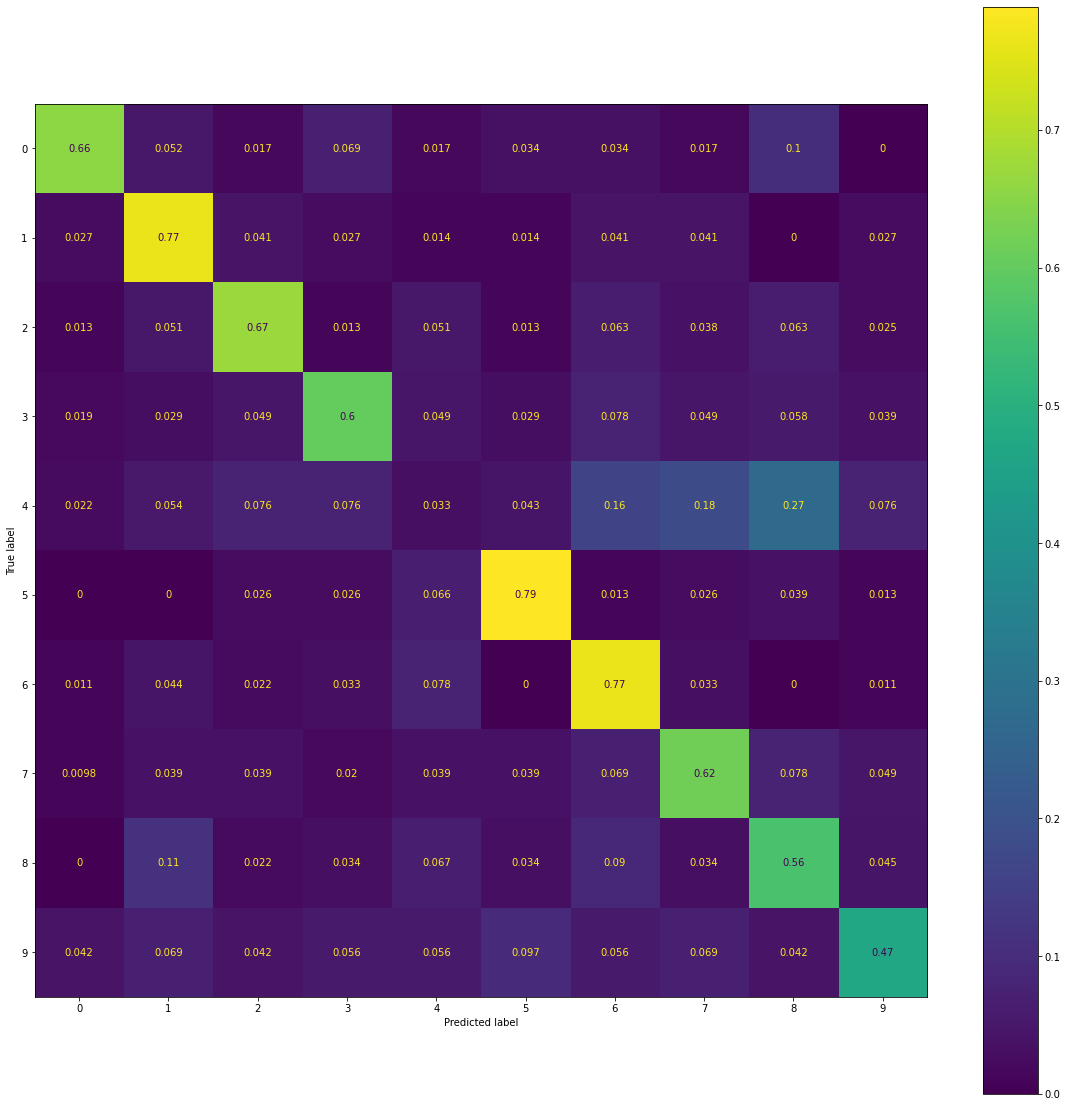

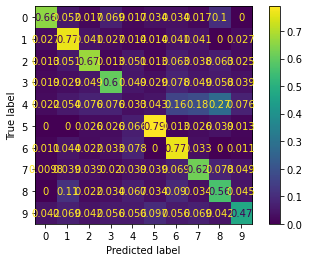

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
disp = ConfusionMatrixDisplay.from_predictions(data['test'].y, classifications, normalize='true', ax=plt.gca())
disp.plot()
plt.show()

(array([8., 4., 8., 7., 6., 7., 2., 3., 2., 3.]),
 array([0.19417476, 0.23924326, 0.28431177, 0.32938027, 0.37444878,
        0.41951729, 0.46458579, 0.5096543 , 0.5547228 , 0.59979131,
        0.64485981]),
 <BarContainer object of 10 artists>)

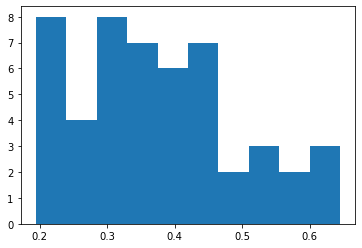

In [11]:
import numpy as np
plt.hist(np.diagonal(cm))

In [25]:
scores = [(cls, score) for cls, score in zip(ds.class_names, np.diagonal(cm))]
print([s[0] for s in sorted(scores, key=lambda x: x[1], reverse=True)[:20]])

['Simon Baker', 'Jon Hamm', 'Blake Lively', 'Jim Parsons', 'Leighton Meester', 'Will Smith', 'Neil Patrick Harris', 'Matthew Perry', 'Jensen Ackles', 'Julianne Moore', 'Bruce Willis', 'George Clooney', 'Nicole Kidman', 'Amy Poehler', 'Reese Witherspoon', 'Zooey Deschanel', 'Harrison Ford', 'Jennifer Aniston', 'Kiefer Sutherland', 'Steve Carell']


In [26]:
np.diagonal(cm)[:10].mean()

0.3528873825552302

In [5]:
ds.class_names

array(['Simon Baker', 'Jon Hamm', 'Blake Lively', 'Jim Parsons',
       'Leighton Meester', 'Will Smith', 'Neil Patrick Harris',
       'Matthew Perry', 'Jensen Ackles', 'Julianne Moore'], dtype='<U19')

0.0 169.0121527777778 Jensen Ackles


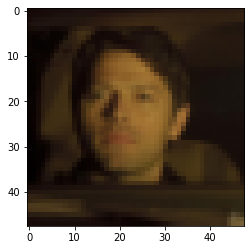

0.4166666666666856 222.47916666666666 Neil Patrick Harris


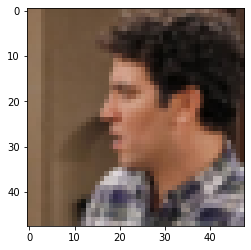

0.0 254.0 Jensen Ackles


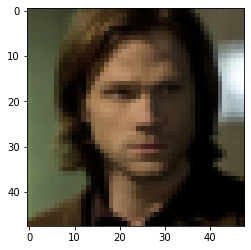

1.0 217.10677083333306 Jon Hamm


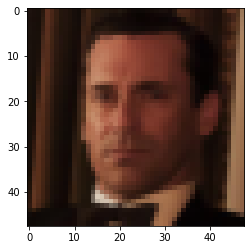

8.0 254.0 Simon Baker


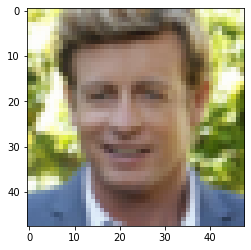

15.49999999999999 221.31249999999997 Matthew Perry


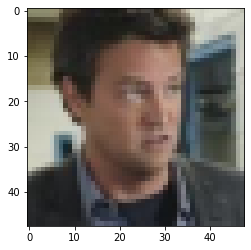

2.0 253.0 Julianne Moore


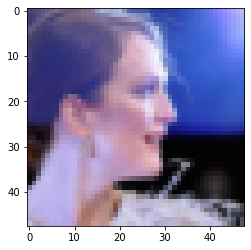

0.0 248.291015625 Matthew Perry


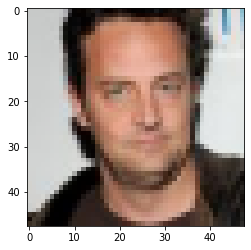

3.0 223.6666666666665 Bruce Willis


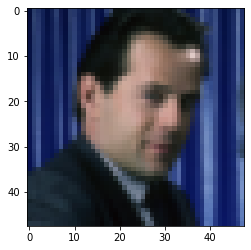

0.0 251.25 Julianne Moore


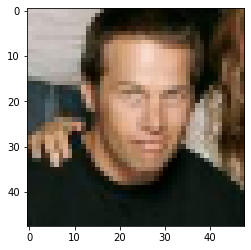

8.010416666666664 250.0 Jim Parsons


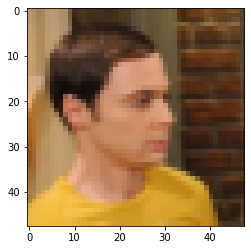

4.791666666666693 246.0 Jon Hamm


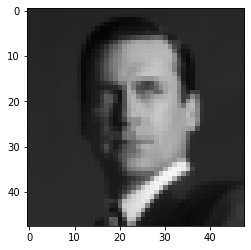

7.978802803639255e-14 254.94791666666666 Julianne Moore


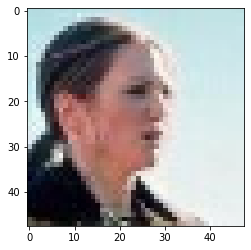

0.0 229.46874999999994 Leighton Meester


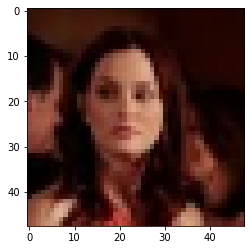

4.0 251.0 Jim Parsons


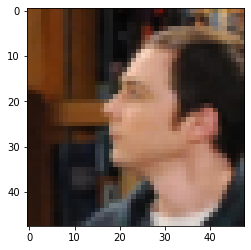

10.0 212.0 Simon Baker


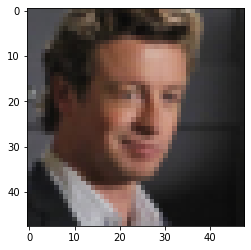

0.0 246.74479166666669 Leighton Meester


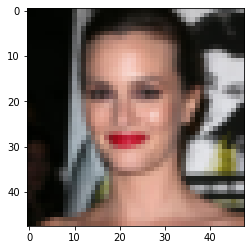

2.0 248.14257812500006 Leighton Meester


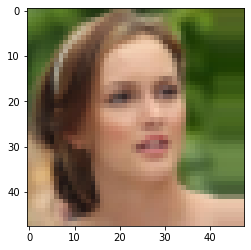

11.671006944444418 240.8927951388889 Jim Parsons


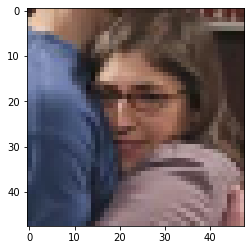

23.0 252.92708333333343 Matthew Perry


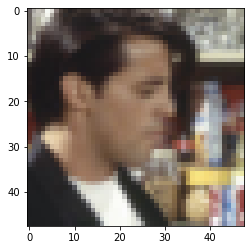

21.687500000000092 255.0 Will Smith


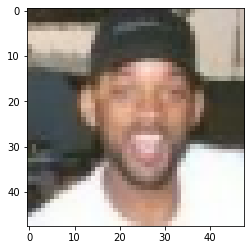

8.921874999999988 246.63281249999994 Julianne Moore


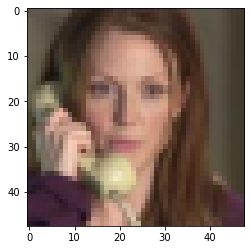

0.8958333333333073 242.1701388888891 Leighton Meester


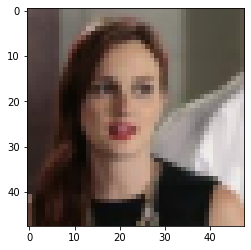

6.613281249999994 249.01519097222223 Will Smith


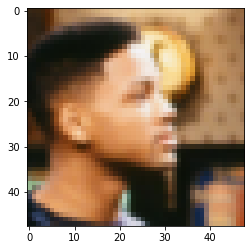

2.3893229166666665 224.49999999999994 Matthew Perry


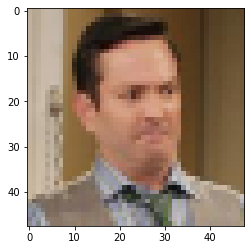

0.0 249.0 Jon Hamm


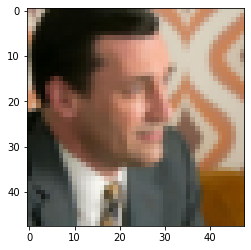

8.684027777777784 253.0 Jon Hamm


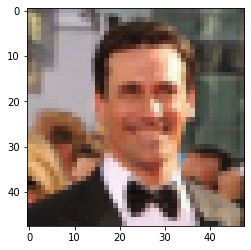

4.0 201.7812500000001 Will Smith


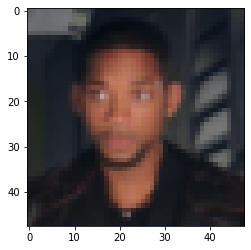

0.0 218.849609375 Leighton Meester


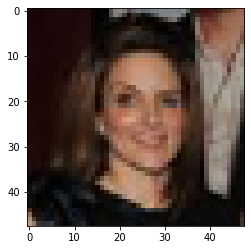

0.15462239583336146 215.86773003472217 Jim Parsons


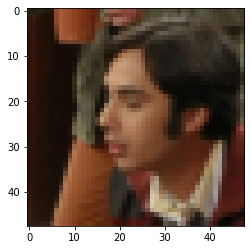

3.0 248.0 Julianne Moore


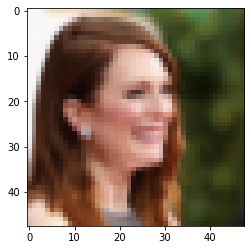

5.0 237.24609375 Julianne Moore


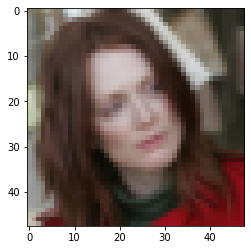

0.0 216.70833333333331 Julianne Moore


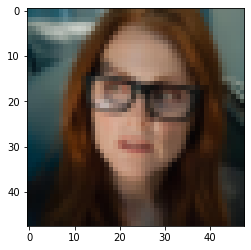

0.4791666666666714 245.89366319444446 Neil Patrick Harris


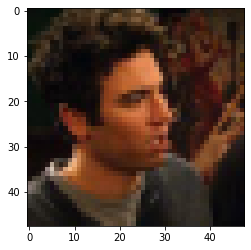

11.0 248.0 Bruce Willis


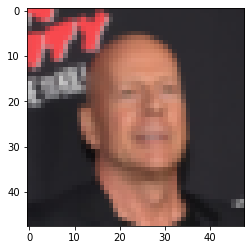

10.0 212.83333333333326 Simon Baker


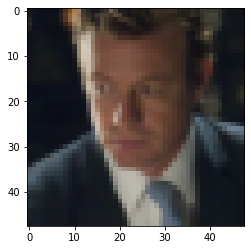

0.0 235.138671875 Leighton Meester


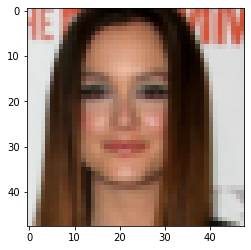

3.308159722222204 252.38541666666663 Neil Patrick Harris


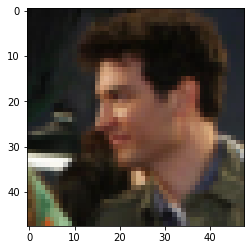

4.0 241.70833333333331 Leighton Meester


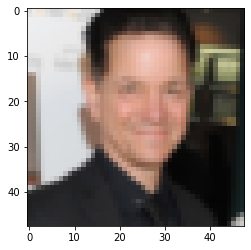

0.0 253.0 Jon Hamm


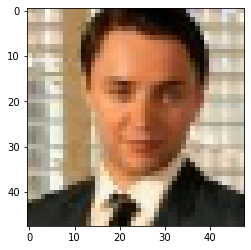

14.75097656250004 205.11816406249994 Jon Hamm


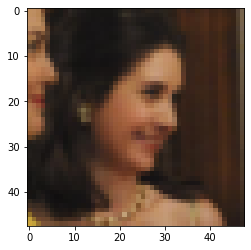

2.419813368055488 254.0 Will Smith


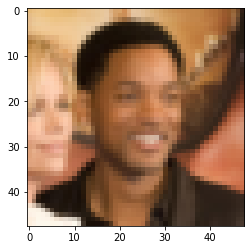

25.656250000000014 253.1145833333332 Jon Hamm


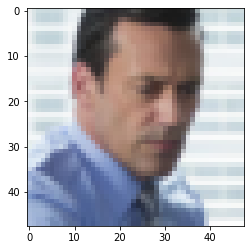

0.0 250.68630642361111 Jensen Ackles


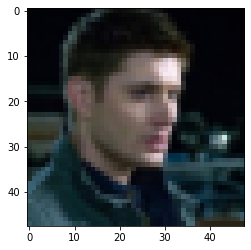

0.0 253.21028645833331 Leighton Meester


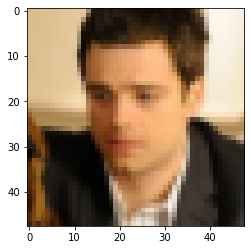

13.197916666666657 254.0 Will Smith


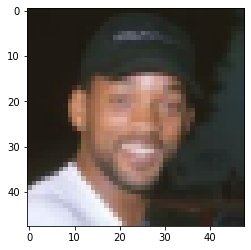

0.0 236.14062500000006 Jensen Ackles


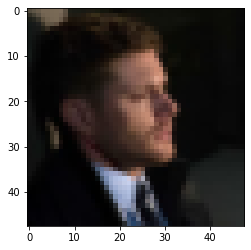

23.0 253.0 Leighton Meester


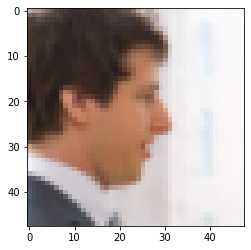

15.0 227.83333333333334 Leighton Meester


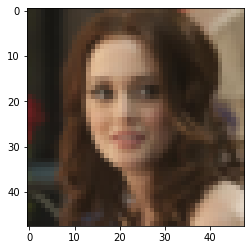

15.472222222222198 242.86111111111114 Leighton Meester


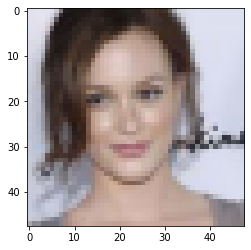

In [6]:
import matplotlib.pyplot as plt
for i in range(50):
    print(data['train'].X[i].min(), data['train'].X[i].max(), ds.class_names[data['train'].y[i]])
    plt.imshow(data['train'].X[i].astype(int))
    plt.show()

NameError: name 'metadata' is not defined

In [8]:
from scipy.io import loadmat
metadata = loadmat(f'../cache/imdbwiki/imdb/imdb.mat')

In [13]:
import numpy as np
np.isfinite(metadata['imdb']['second_face_score'][0][0].flatten()).mean()

0.4640467265580403

In [33]:
plt.hist(metadata['imdb']['face_score'])

array([[array([[1.45969291, 2.5431976 , 3.45557949, ...,       -inf, 4.45072452,
                2.13350269]])                                                   ]],
      dtype=object)

(array([5.0510e+03, 5.4240e+03, 6.0080e+03, 6.5410e+03, 7.1030e+03,
        7.7300e+03, 8.3650e+03, 9.3020e+03, 9.9480e+03, 1.0848e+04,
        1.1266e+04, 1.2161e+04, 1.2921e+04, 1.3408e+04, 1.4288e+04,
        1.4574e+04, 1.4505e+04, 1.5060e+04, 1.5150e+04, 1.5290e+04,
        1.5110e+04, 1.5226e+04, 1.4764e+04, 1.4355e+04, 1.3810e+04,
        1.3573e+04, 1.2426e+04, 1.2149e+04, 1.1487e+04, 1.0523e+04,
        9.6390e+03, 8.3590e+03, 7.1920e+03, 6.1310e+03, 4.9980e+03,
        3.9540e+03, 3.0570e+03, 2.2420e+03, 1.6790e+03, 1.1500e+03,
        6.8700e+02, 4.4300e+02, 2.1900e+02, 1.5400e+02, 6.6000e+01,
        4.5000e+01, 2.4000e+01, 8.0000e+00, 5.0000e+00, 3.0000e+00]),
 array([0.73091908, 0.86393448, 0.99694987, 1.12996527, 1.26298066,
        1.39599605, 1.52901145, 1.66202684, 1.79504223, 1.92805763,
        2.06107302, 2.19408841, 2.32710381, 2.4601192 , 2.59313459,
        2.72614999, 2.85916538, 2.99218077, 3.12519617, 3.25821156,
        3.39122696, 3.52424235, 3.65725774, 3.

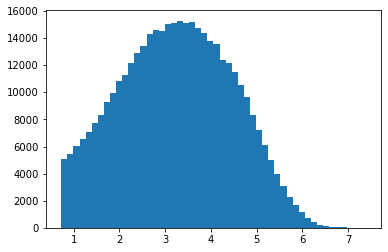

In [43]:
import numpy as np
x = metadata['imdb']['face_score'][0][0].flatten()
x = x[np.isfinite(x)]
plt.hist(x, bins=50)

In [45]:
x = metadata['imdb']['face_score'][0][0].flatten()
np.isfinite(x).mean()

0.8647734104874295

In [47]:
(x > 2).mean()

0.7101121498167011